In [1]:
# Parameters
MSA_MARKET = "San Francisco"
BRAND_MSA = "San Francisco-Oakland-San Jose, CA"


In [2]:
import pandas as pd
import datetime as dt
import numpy as np
from snowflake.connector.pandas_tools import write_pandas
import snowflake.connector
import os



In [3]:
# Import the function from your external script
from IOS_query import run_snowflake_query

# Run the query and get the results as a DataFrame
ios_df = run_snowflake_query()

# Display the DataFrame
ios_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNRb9owFIX%2FSuQ9J3ZSkoAFVBkMilY2BmFofXMcBzwSm9lOA%2Fv1M0mROk2ttDfr%2Bhz7u%2FfYw%2FtzVTrPTGkuxQj4HgIOE1TmXOxHYJvO3D5wtCEiJ6UUbAQuTIP78VCTqjzhpDYHsWa%2FaqaNYw8SGrcbI1ArgSXRXGNBKqaxoXiTLB9x4CF8UtJIKkvwyvK%2Bg2jNlLGEN0uuucU7GHPCEDZN4zV3nlR7GCCEIBpAq7pKPtz0Z9vTG3ofot5VbxVWvnph%2B8hFN4L3sLJOpPFDmq7c1ddNCpzkhjqRQtcVUxumnjll2%2FVjB6Atwc9am0aqo3YrwoWnhWyKkhwZldWpNvZIz65gwXJYyj23XS%2BmI3A68vw432z58jKvZj9IOk9356fq86ck2PUny%2FVhly2Sc1hVD7%2B%2FXXZLCpzvt1iDa6wLrWu2ENcwjS2hoOf6vhv4aeBjv4%2BDvhdE8RNwpjZMLohpnf8Qe7SUdW5pFSOUMq1bVJoLl%2B457EpQawmvqcI87mUURRklIcmKKIrimPgR8X0WBXchi1GBCI3DArFeFFCaMzKIszCjWUhJNhjcge6l4ZZdj

/Users/lmola/Documents/Luis_Projects/OOH/prod/IOS_query.py:185: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(io_query, conn)


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,INBOUND_EXCLUSION_FLAG,OWNER,OPPORTUNITY_ID,QL_REFERRER_NAME,QL_REFERRER_ROLE,QL_SOURCED_BY_NAME,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL
0,006PJ00000DbzjNYAR,001PJ00000ERzddYAD,001PJ00000ERzddYAD,Sulphur,OK,None,73086,20252,2024-09-30,2,...,Include,Self Service,None,None,None,None,None,None,None,None
1,006PJ000000n0GcYAI,001PJ000000tp59YAA,001PJ000000tp59YAA,None,None,None,60016,20241,2023-07-31,1,...,Include,Self Service,None,None,None,None,None,None,None,None
2,0066S000015V4CwQAK,0016S00003M3VpfQAF,0016S00003M3VpfQAF,None,None,None,38372,20234,2023-03-13,4,...,Include,Self Service,None,None,None,None,None,None,None,None
3,006PJ00000AtL4WYAV,001PJ00000BCOEuYAP,001PJ00000BCOEuYAP,Dallas State,TX,None,75204,20251,2024-06-24,1,...,Include,Self Service,None,None,None,None,None,None,None,None
4,006PJ00000DWwmDYAT,001PJ00000ELZPKYA5,001PJ00000ELZPKYA5,Brooklyn,NY,None,11215,20252,2024-09-30,2,...,Include,Self Service,None,None,None,None,None,None,None,None


In [4]:
# Import the function from your external script
from district_map_query import map_query

# Run the query and get the results as a DataFrame
map_df = map_query()
map_df = map_df[['ZIP_CODE__C', 'STATE__C', 'STATE_ABBREVIATION__C', 'MSA_MARKET_PRIMARY__C', 'MSA_NUMBER__C', 'MARKETING_DISTRICT__C']]

# Display the DataFram

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNfT9swFMW%2FSuQ9J7bT%2FKEWLSogtk7QdtAyjTfHuSmGxO5spyl8%2BrkplZgmkPZmXZ9j%2F%2B499unZrqmDLRgrtRohGhEUgBK6lGo9QqvlVXiCAuu4KnmtFYzQC1h0Nj61vKk3bNK6R3ULv1uwLvAHKcv6jRFqjWKaW2mZ4g1Y5gS7m9xcszgibGO000LX6J3lcwe3FozzhEdLaaXHe3RuwzDuui7qBpE2axwTQjAZYq%2FaS74c9Tvf0wd6ikmy13uFly%2Fe2M6lOozgM6ziILLs23K5CBfzuyUKJkfUC61s24C5A7OVAla31wcA6wmeWus6bZ5t2HCpIqt0V9X8GYRuNq3zR0Z%2BhSsoca3X0nc9vRyhzbMsu4eneE7TmYJZ8XpDJlPxc7d15PsJnVY%2F4JrfN0%2FnX%2BcrmMe%2FBAruj7HG%2B1in1rYwVfswnS%2BROAkpDWO6jCmjQ0bzKEmTBxRc%2BjCl4q53%2FkMciVq3pac1wIUAa3tUUapQrCU%2BlLC1Gu9TxWWeFIJkheApL6osy%2FKc04xTClk8SCEnFeEiTysCSRYLUQIf5kVaiCIVvBgOB%2Bjw0

/Users/lmola/Documents/Luis_Projects/OOH/prod/district_map_query.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
 map_df.head()

,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,97003,Oregon,OR,"Salem, OR MSA",41420.0,sanitized_f667cee84b45028f5db8f1939e1c06b90c06...
1,21866,Maryland,MD,"Salisbury, MD MSA",41540.0,DC Metro
2,90189,California,CA,"Los Angeles-Long Beach-Santa Ana, CA MSA",31100.0,Los Angeles
3,48557,Michigan,MI,"Flint, MI MSA",22420.0,Rest of Country
4,82931,Wyoming,WY,WY NONMETROPOLITAN AREA,99048.0,Rest of Country


In [6]:
missing_geo_map = map_df.isna().mean() * 100

print("Columns in IOs_filtered with missing values:")
print(missing_geo_map)

Columns in IOs_filtered with missing values:
ZIP_CODE__C              0.0
STATE__C                 0.0
STATE_ABBREVIATION__C    0.0
MSA_MARKET_PRIMARY__C    0.0
MSA_NUMBER__C            0.0
MARKETING_DISTRICT__C    0.0
dtype: float64


In [7]:
print(len(ios_df))
print(len(map_df))

merged_df = pd.merge(ios_df, map_df, left_on='BILLINGZIP', right_on = 'ZIP_CODE__C', how='inner')



print(len(merged_df))

print(f'loss is {1-len(merged_df)/len(ios_df)}')

# Convert the column to date format with specified format
merged_df['IO_DATE'] = pd.to_datetime(merged_df['IO_DATE'], format='%Y-%m-%d')

merged_df.head()

26811
42491
25750
loss is 0.03957330946253401


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,006PJ00000DbzjNYAR,001PJ00000ERzddYAD,001PJ00000ERzddYAD,Sulphur,OK,None,73086,20252,2024-09-30,2,...,None,None,None,None,73086,Oklahoma,OK,OK NONMETROPOLITAN AREA,99035.0,Rest of Country
1,006PJ000000n0GcYAI,001PJ000000tp59YAA,001PJ000000tp59YAA,None,None,None,60016,20241,2023-07-31,1,...,None,None,None,None,60016,Illinois,IL,"Chicago-Naperville-Joliet, IL-IN-WI MSA",16980.0,Chicago
2,0066S000015V4CwQAK,0016S00003M3VpfQAF,0016S00003M3VpfQAF,None,None,None,38372,20234,2023-03-13,4,...,None,None,None,None,38372,Tennessee,TN,TN NONMETROPOLITAN AREA,99040.0,Rest of Country
3,006PJ00000AtL4WYAV,001PJ00000BCOEuYAP,001PJ00000BCOEuYAP,Dallas State,TX,None,75204,20251,2024-06-24,1,...,None,None,None,None,75204,Texas,TX,"Dallas-Fort Worth-Arlington, TX MSA",19100.0,Dallas
4,006PJ00000DWwmDYAT,001PJ00000ELZPKYA5,001PJ00000ELZPKYA5,Brooklyn,NY,None,11215,20252,2024-09-30,2,...,None,None,None,None,11215,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",35620.0,New York Metro


In [8]:
#from datetime import date

# today = date.today()

# # Convert to datetime and round to the start of the month
# today_month_start = pd.to_datetime(today).to_period('M').to_timestamp()

# # Convert back to string in yyyy-mm-dd format
# end_date = today_month_start.strftime('%Y-%m-%d')

# print(end_date)

In [9]:
merged_df['IO_DATE']

0       2024-10-04
1       2023-07-31
2       2023-03-14
3       2024-06-27
4       2024-10-02
           ...    
25745   2023-12-29
25746   2023-03-14
25747   2024-09-26
25748   2023-08-25
25749   2022-01-26
Name: IO_DATE, Length: 25750, dtype: datetime64[ns]

In [10]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [11]:
#import datetime
#merged_df["IO_DATE"] = pd.to_datetime(merged_df["IO_DATE"], errors="coerce")
# Add a 'year_month' column to group by month
merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period('M')
# Convert to datetime and round to the start of the month
#merged_df['check'] = merged_df["year_month"].to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
#end_date = today_month_start.strftime('%Y-%m-%d')

#merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period("M").to_timestamp()
print(merged_df["IO_DATE"])

# Aggregate by month, with multiple aggregations
monthly_aggregated = (
    merged_df.groupby(
        ["year_month", "STATE__C", "STATE_ABBREVIATION__C", "MSA_MARKET_PRIMARY__C"]
    )
    .agg(
        io_count=("IOS", "nunique"),  # Count rows per month
    )
    .reset_index()
)

0       2024-10-04
1       2023-07-31
2       2023-03-14
3       2024-06-27
4       2024-10-02
           ...    
25745   2023-12-29
25746   2023-03-14
25747   2024-09-26
25748   2023-08-25
25749   2022-01-26
Name: IO_DATE, Length: 25750, dtype: datetime64[ns]


In [12]:
monthly_aggregated.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
0,2021-06,Alabama,AL,AL NONMETROPOLITAN AREA,1
1,2021-06,Alabama,AL,"Huntsville, AL MSA",2
2,2021-06,Alabama,AL,"Montgomery, AL MSA",1
3,2021-06,Alaska,AK,"Anchorage, AK MSA",2
4,2021-06,Arizona,AZ,"Phoenix-Mesa-Scottsdale, AZ MSA",8


In [13]:
#Define Parameters


# MSA_MARKET = "New York"
# #STATE = "New York"
# BRAND_MSA = "New York, NY"

# BRAND_MSA_list = ["Austin, TX", "Denver, CO", "Los Angeles, CA", "Miami-Ft. Lauderdale, FL", 
#                   "New York, NY", "San Francisco-Oakland-San Jose, CA"]

# # Used as contains filter 
# MSA_MARKET_list = ["Austin", "Denver", "Los Angeles", "Miami", "New York", "San Francisco"]

# Used as equals filter
city_to_state = {
    "Austin": "Texas",
    "Denver": "Colorado",
    "Los Angeles": "California",
    "Miami": "Florida",
    "New York": "New York",
    "San Francisco": "California"
    
}

STATE = city_to_state[MSA_MARKET]

print('the state is ' + STATE)

#intervention_date = '2024-08-01'

campaign_start_dict = {'Austin, TX': '2024-09-09', 'Denver, CO': '2024-08-19', \
    'Los Angeles, CA': '2024-09-02', 'Miami-Ft. Lauderdale, FL': '2024-08-26',\
    'New York, NY': '2024-08-26', 'San Francisco-Oakland-San Jose, CA': '2024-09-02',\
    'Queens_New York': '2024-08-26', 'Brooklyn_New York': '2024-08-26',\
    'The Bronx_New York': '2024-08-26', 'Jersey City_New Jersey': '2024-08-26',\
    'Newark_New Jersey': '2024-08-26', 'San Jose_California': '2024-09-02'
    }


# Convert to datetime and round to the start of the month
month_start = pd.to_datetime(campaign_start_dict[BRAND_MSA]).to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
intervention_date = month_start.strftime('%Y-%m-%d')

print(intervention_date)
#date_start = campaign_start_dict[treatment_city_region]


the state is California
2024-09-01


In [14]:
city_monthly_data = monthly_aggregated[
    monthly_aggregated["MSA_MARKET_PRIMARY__C"].str.contains(MSA_MARKET, case=False)
    & (monthly_aggregated["STATE__C"] == STATE)
    #& (monthly_aggregated["year_month"] >= '2022')
].sort_values(by="year_month", ascending=True)

city_monthly_data.head(5)

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
13,2021-06,California,CA,"San Francisco-Oakland-Fremont, CA MSA",27
137,2021-07,California,CA,"San Francisco-Oakland-Fremont, CA MSA",27
275,2021-08,California,CA,"San Francisco-Oakland-Fremont, CA MSA",30
390,2021-09,California,CA,"San Francisco-Oakland-Fremont, CA MSA",27
509,2021-10,California,CA,"San Francisco-Oakland-Fremont, CA MSA",23


In [15]:
city_monthly_data["year_month"] = city_monthly_data["year_month"].dt.to_timestamp()
city_monthly_data.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
13,2021-06-01,California,CA,"San Francisco-Oakland-Fremont, CA MSA",27
137,2021-07-01,California,CA,"San Francisco-Oakland-Fremont, CA MSA",27
275,2021-08-01,California,CA,"San Francisco-Oakland-Fremont, CA MSA",30
390,2021-09-01,California,CA,"San Francisco-Oakland-Fremont, CA MSA",27
509,2021-10-01,California,CA,"San Francisco-Oakland-Fremont, CA MSA",23


In [16]:

#from datetime import date



print(intervention_date)

marketing_pre_period = city_monthly_data[
    city_monthly_data["year_month"] < intervention_date
][["year_month", "io_count"]]

today = dt.date.today()

# # Convert to datetime and round to the start of the month
today_month_start = pd.to_datetime(today).to_period('M').to_timestamp()

# # Convert back to string in yyyy-mm-dd format
treatment_end_date = today_month_start.strftime('%Y-%m-%d')

print(treatment_end_date)


marketing_post_period = city_monthly_data[
    (city_monthly_data["year_month"]
    >= intervention_date) & (city_monthly_data["year_month"]
    < treatment_end_date)
][["year_month", "io_count"]]

marketing_pre_period.head()

# ['2010-02-05','2012-06-29']


# marketing_post_period.head()

2024-09-01
2024-11-01


,year_month,io_count
13,2021-06-01,27
137,2021-07-01,27
275,2021-08-01,30
390,2021-09-01,27
509,2021-10-01,23


In [17]:
df_final = city_monthly_data[['year_month', 'io_count']]
# Convert the date column to datetime (if it's not already)
df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary

# Set the date column as the index
df_final.set_index('year_month', inplace=True)
df_final.head()

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_38273/330667666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary


,io_count
year_month,
2021-06-01,27
2021-07-01,27
2021-08-01,30
2021-09-01,27
2021-10-01,23


In [18]:
type(marketing_post_period)

pandas.core.frame.DataFrame

In [19]:
# Combine data
#intervention_date = '2024-08-01'
data = pd.concat([marketing_pre_period, marketing_post_period])
data["intervention"] = data["year_month"] >= pd.to_datetime(intervention_date)
data["t"]=range(len(data))
data['month'] = data['year_month'].dt.month

data_final = data.set_index('year_month')


In [20]:
data.head()

,year_month,io_count,intervention,t,month
13,2021-06-01,27,False,0,6
137,2021-07-01,27,False,1,7
275,2021-08-01,30,False,2,8
390,2021-09-01,27,False,3,9
509,2021-10-01,23,False,4,10


In [21]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,27,False,0,6
2021-07-01,27,False,1,7
2021-08-01,30,False,2,8
2021-09-01,27,False,3,9
2021-10-01,23,False,4,10


In [22]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,33,False,36,6
2024-07-01,38,False,37,7
2024-08-01,33,False,38,8
2024-09-01,35,True,39,9
2024-10-01,45,True,40,10


In [23]:
data_final.isna().sum()

io_count        0
intervention    0
t               0
month           0
dtype: int64

In [24]:
data_final.head()


,io_count,intervention,t,month
year_month,,,,
2021-06-01,27,False,0,6
2021-07-01,27,False,1,7
2021-08-01,30,False,2,8
2021-09-01,27,False,3,9
2021-10-01,23,False,4,10


In [25]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,33,False,36,6
2024-07-01,38,False,37,7
2024-08-01,33,False,38,8
2024-09-01,35,True,39,9
2024-10-01,45,True,40,10


In [26]:
# Import the function from your external script
from direct_search_query import run_direct_search_query

# Run the query and get the results as a DataFrame
#direct_search_df = run_direct_search_query('New York', 'New York')
direct_search_df = run_direct_search_query(MSA_MARKET, STATE)

# Display the DataFrame
direct_search_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNRb9owFIX%2FSuQ9J45DSMACKgZqx1YKBbpJe3NsQw2JHWynof31cwhInaZW2lt0c66%2Fc%2B%2BxBzenIvdeuDZCySFAQQg8LqliQu6G4Glz6%2FeAZyyRjORK8iF45QbcjAaGFHmJx5V9lit%2BrLixnjtIGtz8GIJKS6yIEQZLUnCDLcXr8fweR0GIiTFcW4cDlxZmhGM9W1tiCOu6DupOoPQORmEYwrAPnaqRfAHvEOXnjFIrq6jKry0nN9MHCATDuEE4hSMsL41fhWxX8Bkla0UGf9tslv5ysd4Ab3ydbqKkqQqu11y%2FCMqfVvetAeMc7Ctja6UPxi%2BIkIGRqt7m5MCpKsrKuiMD9wW3nMFc7YRb1Gw6BOVBsPJwQtPenjwmlXq7ixe%2FVmxyd6x%2FaPn2%2FRDPGSGL7Igeq%2F1yToH38xpr1MQ6M6biM9mEaV0pjGIfIT9Cmwhh1MdRJ%2Bil6Dfwpi5MIYk9d%2F7jOKC5qphzqzmhlBtztkqZ9OlOwLYEjVGwSQmyNM5omGSUdEm2TZIkTQlKCEI8iTpdnobbkNC0uw15nESUMk76adbNaNalJOv3O6C9afjsXY%

/Users/lmola/Documents/Luis_Projects/OOH/prod/direct_search_query.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(direct_query, conn)


,CITY,REGION,COUNTRY,MARKETING_CHANNEL,MONTH_START,MONTHLY_SUM
1583,San Francisco,California,United States,Direct,2022-03-01,236
4865,San Francisco,California,United States,Direct,2022-04-01,172
6464,San Francisco,California,United States,Direct,2022-05-01,120
8887,San Francisco,California,United States,Direct,2022-06-01,187
14170,San Francisco,California,United States,Direct,2022-07-01,4611


In [27]:
# Import the function from your external script
from brand_search_query import run_brand_search_query

# Run the query and get the results as a DataFrame
print(MSA_MARKET)
print(STATE)
print(BRAND_MSA)

brand_search_df = run_brand_search_query()

brand_search_df = brand_search_df[(brand_search_df['METRO'] == BRAND_MSA) & (brand_search_df['REGION'] == STATE)]

# Display the DataFrame
brand_search_df.head()

San Francisco
California
San Francisco-Oakland-San Jose, CA
Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNRbyIhFIX%2FyoR9ngFGHVeiNm6NrWntmqqbbN8YQGVlwHKZjt1fv6g16WbTJvtGLufAd%2B%2BB%2FtWhMsmL8qCdHSCaEZQoK5zUdjNAq%2BUk%2FYoSCNxKbpxVA%2FSqAF0N%2B8Ars2ejOmzto3quFYQkHmSBnTYGqPaWOQ4amOWVAhYEW4xm9yzPCNt7F5xwBr2zfO7gAMqHSHixSNARbxvCnmHcNE3WtDLnNzgnhGDSw1F1lHy56A%2Bxpw%2F0FJP2UR8VUT5%2FY%2Fum7XkEn2GVZxGw2%2BVyns6%2FL5YoGV1Qr52FulJ%2BofyLFmr1eH8GgEjwq4bQOL%2BDtOLaZmBdszZ8p4Sr9nWIR2ZxhddKYuM2OnY9HQ%2FQfqfl74c7QZre9uZ5ooqn%2Fc6Bv%2FXGF%2BrnuLgzB3guZstZfmM2ciVQ8uMSa36MdQpQq6k9hhliieTtlNI0p8ucMtpjLZK1aP6EknEMU1seTs5%2FiDNhXC0jrVdcCAVwQhXSpmKj8bmEARw%2Bpoplt10

/Users/lmola/Documents/Luis_Projects/OOH/prod/brand_search_query.py:70: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(brand_query, conn)


,STATE,REGION,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
80,California,California,"San Francisco-Oakland-San Jose, CA",0.00,3,0,2024-08-01
100,California,California,"San Francisco-Oakland-San Jose, CA",2.13,4,2,2022-02-01
277,California,California,"San Francisco-Oakland-San Jose, CA",26.88,8,3,2022-11-01
360,California,California,"San Francisco-Oakland-San Jose, CA",7.38,3,1,2023-05-01
717,California,California,"San Francisco-Oakland-San Jose, CA",9.73,3,3,2024-04-01


In [28]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,27,False,0,6
2021-07-01,27,False,1,7
2021-08-01,30,False,2,8
2021-09-01,27,False,3,9
2021-10-01,23,False,4,10


In [29]:
data_reset = data_final.reset_index()
data_reset.head()

,year_month,io_count,intervention,t,month
0,2021-06-01,27,False,0,6
1,2021-07-01,27,False,1,7
2,2021-08-01,30,False,2,8
3,2021-09-01,27,False,3,9
4,2021-10-01,23,False,4,10


In [30]:
# Join DataFrames

# Convert column to datetime
data_reset['year_month'] = pd.to_datetime(data_reset['year_month'])
direct_search_df['MONTH_START'] = pd.to_datetime(direct_search_df['MONTH_START'])

df_merge_1 = pd.merge(data_reset, direct_search_df, left_on = 'year_month', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_1 = df_merge_1.rename(columns={'MONTH_START': 'direct_month_start', 'MONTHLY_SUM': 'direct_search_sum'})
df_merge_1 = df_merge_1.drop(columns = 'MARKETING_CHANNEL')

df_merge_1.head()

,year_month,io_count,intervention,t,month,CITY,REGION,COUNTRY,direct_month_start,direct_search_sum
0,2022-03-01,30,False,9,3,San Francisco,California,United States,2022-03-01,236
1,2022-04-01,21,False,10,4,San Francisco,California,United States,2022-04-01,172
2,2022-05-01,20,False,11,5,San Francisco,California,United States,2022-05-01,120
3,2022-06-01,21,False,12,6,San Francisco,California,United States,2022-06-01,187
4,2022-07-01,19,False,13,7,San Francisco,California,United States,2022-07-01,4611


In [31]:
brand_search_df['MONTH_START'] = pd.to_datetime(brand_search_df['MONTH_START'])

df_merge_2 = pd.merge(df_merge_1, brand_search_df, left_on = 'direct_month_start', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_2.head()



,year_month,io_count,intervention,t,month,CITY,REGION_x,COUNTRY,direct_month_start,direct_search_sum,STATE,REGION_y,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
0,2022-03-01,30,False,9,3,San Francisco,California,United States,2022-03-01,236,California,California,"San Francisco-Oakland-San Jose, CA",1.51,6,1,2022-03-01
1,2022-04-01,21,False,10,4,San Francisco,California,United States,2022-04-01,172,California,California,"San Francisco-Oakland-San Jose, CA",12.42,6,2,2022-04-01
2,2022-05-01,20,False,11,5,San Francisco,California,United States,2022-05-01,120,California,California,"San Francisco-Oakland-San Jose, CA",15.58,8,4,2022-05-01
3,2022-06-01,21,False,12,6,San Francisco,California,United States,2022-06-01,187,California,California,"San Francisco-Oakland-San Jose, CA",7.55,8,1,2022-06-01
4,2022-07-01,19,False,13,7,San Francisco,California,United States,2022-07-01,4611,California,California,"San Francisco-Oakland-San Jose, CA",0.00,2,0,2022-07-01


In [32]:
columns_to_drop = ['CITY', 'REGION_x', 'COUNTRY', 'direct_month_start', 'STATE', 'REGION_y', 'METRO', 'MONTH_START']

df_final2 = df_merge_2.drop(columns = columns_to_drop)
df_final2 = df_final2.set_index('year_month')
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,30,False,9,3,236,1.51,6,1
2022-04-01,21,False,10,4,172,12.42,6,2
2022-05-01,20,False,11,5,120,15.58,8,4
2022-06-01,21,False,12,6,187,7.55,8,1
2022-07-01,19,False,13,7,4611,0.00,2,0


In [33]:
df_final2['direct_search_sum'].describe()

count       31.000000
mean      8308.032258
std       3454.431362
min        120.000000
25%       8283.500000
50%       9455.000000
75%      10298.500000
max      12227.000000
Name: direct_search_sum, dtype: float64

In [34]:
df_final2 = df_final2[df_final2['direct_search_sum'] > 2]	

In [35]:
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,30,False,9,3,236,1.51,6,1
2022-04-01,21,False,10,4,172,12.42,6,2
2022-05-01,20,False,11,5,120,15.58,8,4
2022-06-01,21,False,12,6,187,7.55,8,1
2022-07-01,19,False,13,7,4611,0.00,2,0


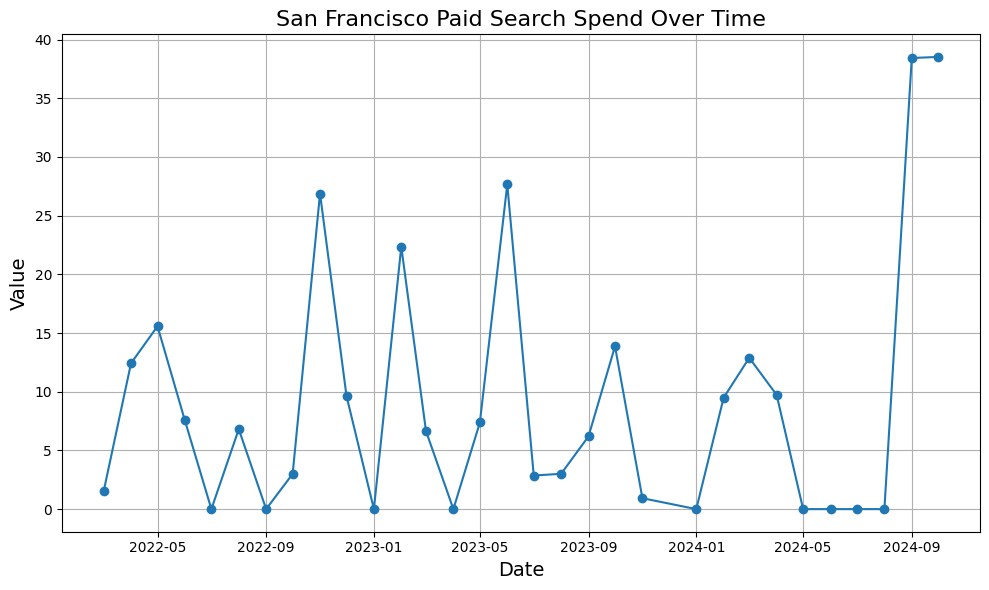

In [36]:

import matplotlib.pyplot as plt

df_series = df_final2.reset_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_series['year_month'], df_series['SPEND'], marker='o')

# Customize the plot
plt.title(f'{MSA_MARKET} Paid Search Spend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig(fname = f'{MSA_MARKET} Paid Search Over Time')
# Show the plot
plt.show()

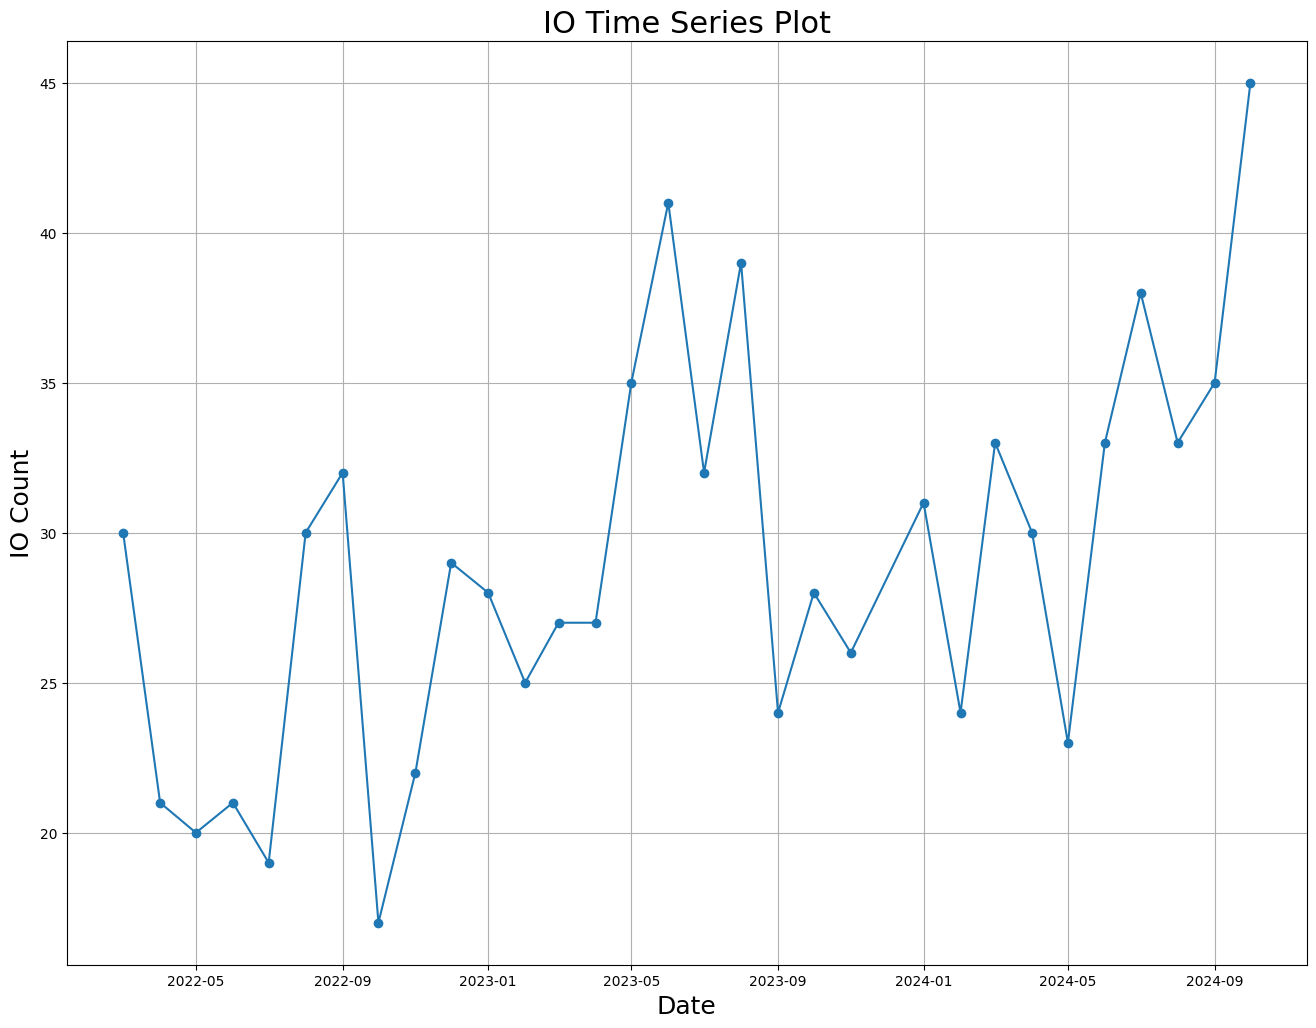

In [37]:
# Plot time series
#plt.plot(df_series['io_count'])


plt.figure(figsize=(16, 12))
plt.plot(df_series['year_month'], df_series['io_count'], marker='o')
plt.title('IO Time Series Plot', fontsize = 22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('IO Count', fontsize=18)
plt.grid(True)
plt.savefig(fname = f'{MSA_MARKET} IOs Over Time ')
plt.show()

In [38]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_series['io_count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.8575676478327314
p-value: 0.050509487498544246


<Figure size 1000x600 with 0 Axes>

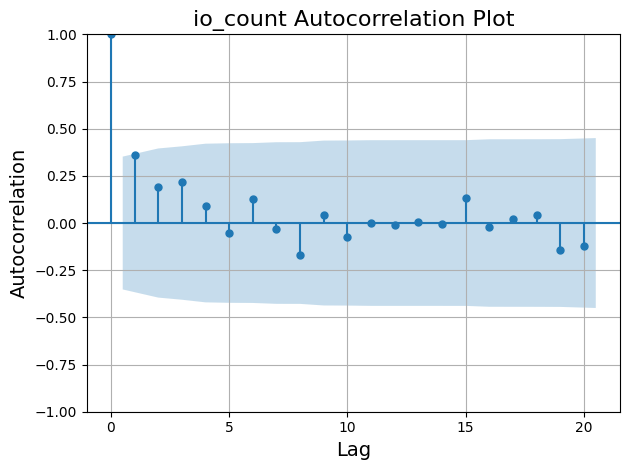

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot autocorrelation
plt.figure(figsize=(10, 6))
plot_acf(df_series['io_count'], lags=20)  # Specify number of lags
plt.title('io_count Autocorrelation Plot', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

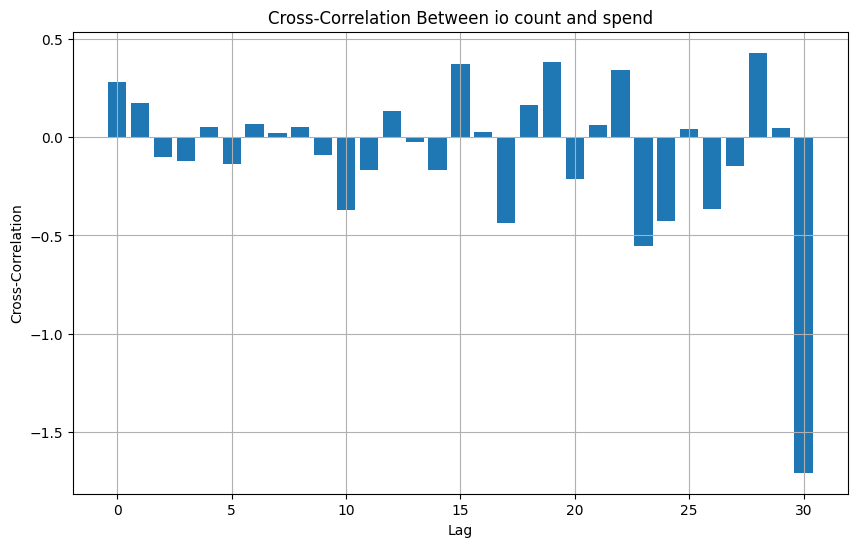

In [40]:
from statsmodels.tsa.stattools import ccf

# Compute cross-correlation between two features
cross_corr = ccf(df_series['io_count'], df_series['SPEND'])

# Plot the cross-correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(cross_corr)), cross_corr)
plt.title('Cross-Correlation Between io count and spend')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid()
plt.show()

In [41]:
#adding lags
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,30,False,9,3,236,1.51,6,1
2022-04-01,21,False,10,4,172,12.42,6,2
2022-05-01,20,False,11,5,120,15.58,8,4
2022-06-01,21,False,12,6,187,7.55,8,1
2022-07-01,19,False,13,7,4611,0.00,2,0


In [42]:
k = 1
df_final3 = df_final2.copy()
df_final3['lag_SPEND'] = df_final3['SPEND'].shift(k)
df_final3['lag_direct_search_sum'] = df_final3['direct_search_sum'].shift(k)
df_final3['lag_IMPRESSIONS'] = df_final3['IMPRESSIONS'].shift(k)
df_final3['lag_io_count'] = df_final3['io_count'].shift(k)
df_final3 = df_final3.dropna()
df_final3.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2022-04-01,21,False,10,4,172,12.42,6,2,1.51,236.0,6.0,30.0
2022-05-01,20,False,11,5,120,15.58,8,4,12.42,172.0,6.0,21.0
2022-06-01,21,False,12,6,187,7.55,8,1,15.58,120.0,8.0,20.0
2022-07-01,19,False,13,7,4611,0.00,2,0,7.55,187.0,8.0,21.0
2022-08-01,30,False,14,8,7628,6.81,3,1,0.00,4611.0,2.0,19.0


In [43]:
df_final3.tail()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2024-06-01,33,False,36,6,9393,0.00,1,0,0.00,9890.0,2.0,23.0
2024-07-01,38,False,37,7,9695,0.00,8,0,0.00,9393.0,1.0,33.0
2024-08-01,33,False,38,8,9455,0.00,3,0,0.00,9695.0,8.0,38.0
2024-09-01,35,True,39,9,11213,38.43,8,5,0.00,9455.0,3.0,33.0
2024-10-01,45,True,40,10,9971,38.52,8,4,38.43,11213.0,8.0,35.0


In [44]:
import causalpy as cp

seed=42
result4 = cp.InterruptedTimeSeries(
    data=df_final3,
    treatment_time=pd.Timestamp(intervention_date),
    formula="io_count ~ 1 + t + C(month) + direct_search_sum + SPEND + IMPRESSIONS + \
         + lag_io_count",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [beta, sigma]


/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 4 seconds.


There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


Sampling: [beta, sigma, y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


Sampling: [y_hat]


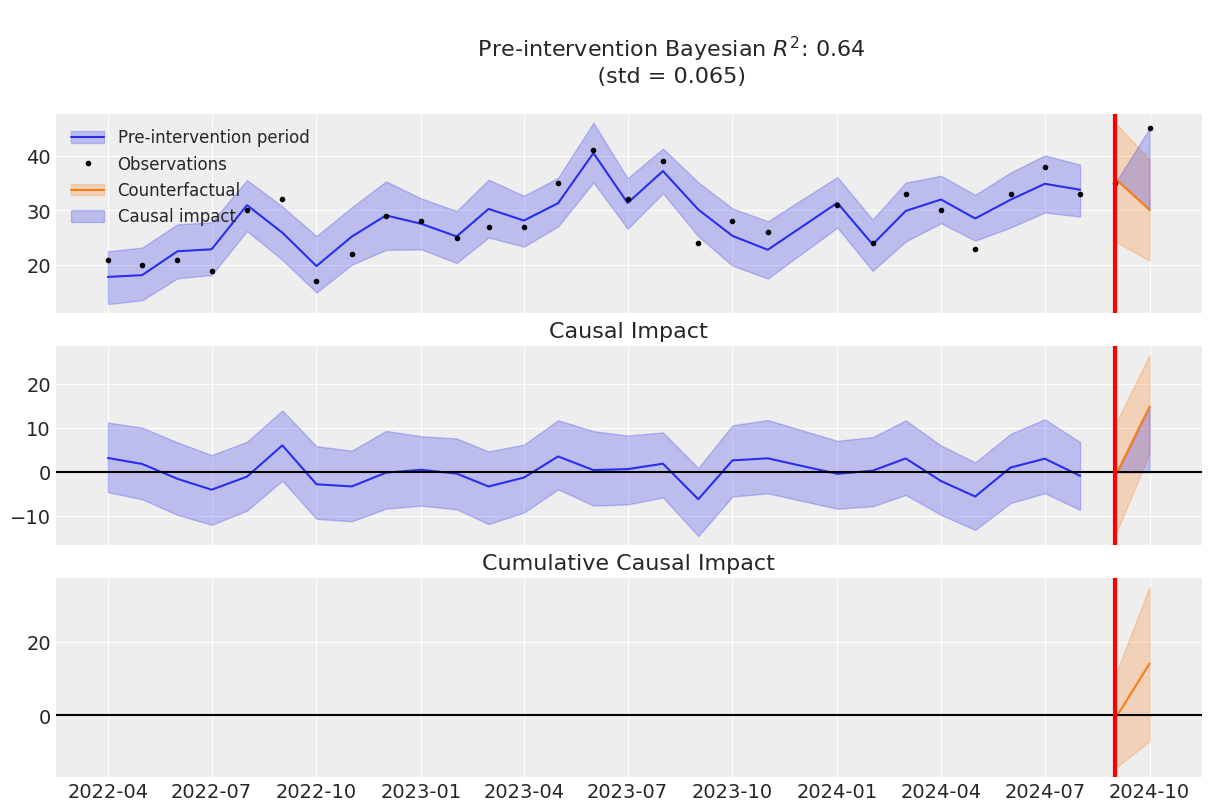

In [45]:
fig4, ax = result4.plot()

# Adjust the figure size
fig4.set_size_inches(12, 8)  # Example: Width = 12 inches, Height = 8 inches

Causal Graph for San Francisco saved as San Francisco_plot.png


(0.0, 1.0, 0.0, 1.0)

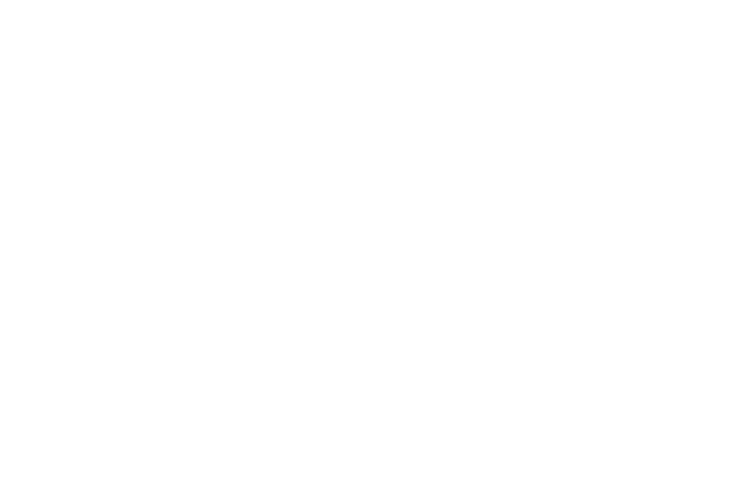

In [46]:
import matplotlib.image as mpimg



fig4.savefig(f"{MSA_MARKET}_causal_impact_plot.png")
plt.close()  # Close the figure to avoid overwriting
print(f"Causal Graph for {MSA_MARKET} saved as {MSA_MARKET}_plot.png")
plt.axis('off')  # Turn off axes for better visualization
# img = mpimg.imread(f"{MSA_MARKET}_plot.png")#
# plt.imshow(img)

In [47]:
# List all attributes and methods of the model object
print(dir(result4))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_x_design_info', '_y_design_info', 'bayesian_plot', 'datapost', 'datapre', 'expt_type', 'formula', 'idata', 'input_validation', 'labels', 'model', 'ols_plot', 'outcome_variable_name', 'plot', 'post_X', 'post_impact', 'post_impact_cumulative', 'post_pred', 'post_y', 'pre_X', 'pre_impact', 'pre_pred', 'pre_y', 'print_coefficients', 'score', 'summary', 'supports_bayes', 'supports_ols', 'treatment_time']


In [48]:
pre_pred_samples = result4.pre_pred.posterior_predictive["y_hat"]
print(pre_pred_samples)  # Check the structure

<xarray.DataArray 'y_hat' (chain: 4, draw: 1000, obs_ind: 28)> Size: 896kB
array([[[18.78111298, 19.1365435 , 21.21028401, ..., 29.52731419,
         38.23943018, 31.68016144],
        [16.71653562, 20.06094738, 18.2705029 , ..., 31.08269342,
         38.25701259, 33.7984704 ],
        [16.62715528, 22.43089193, 27.77287273, ..., 29.2912975 ,
         29.23325225, 29.9638097 ],
        ...,
        [13.90606693, 20.8071105 , 26.81059221, ..., 35.93047148,
         43.73871439, 33.87237554],
        [17.94040841, 18.31406319, 24.3231276 , ..., 25.70011991,
         35.3817401 , 29.37077578],
        [19.97967386, 16.84413098, 17.91185751, ..., 30.65836538,
         35.58742533, 33.90233242]],

       [[22.02639438, 25.84431747, 17.72668193, ..., 30.77690024,
         33.9139167 , 35.53437761],
        [12.82958043, 10.30776509, 21.47723281, ..., 33.67669841,
         33.35949229, 33.24755359],
        [13.5250616 , 19.91354409, 22.27363489, ..., 29.38262084,
         34.83940818, 38.210

In [49]:
# Compute the mean prediction across posterior samples
pre_pred_mean = pre_pred_samples.mean(dim="draw")
pre_pred_mean


<xarray.DataArray 'y_hat' (chain: 4, obs_ind: 28)> Size: 896B
array([[17.69328426, 18.21409653, 22.45982433, 23.18637724, 30.9155718 ,
        25.75299465, 19.88679378, 24.93623954, 29.17205187, 27.62585161,
        25.13638128, 30.20491444, 28.12466701, 31.25940647, 40.28776515,
        31.25106355, 37.00016908, 30.00660352, 25.21972149, 22.8785291 ,
        31.63759301, 23.59762957, 29.77524709, 31.96410291, 28.74386134,
        31.94931607, 34.92227161, 33.8435286 ],
       [17.91915993, 18.10652203, 22.39957449, 22.84902103, 31.1423818 ,
        26.07113847, 19.68444255, 25.3484612 , 28.95531892, 27.45715882,
        25.47892807, 30.40938086, 28.24762287, 31.52062552, 40.71112592,
        31.29487082, 37.21798485, 29.94675717, 25.25695343, 22.74178831,
        31.34154016, 23.62379313, 29.97523427, 32.04297184, 28.31073507,
        31.98340101, 34.80076584, 33.87823443],
       [17.77835351, 18.10030569, 22.47660141, 22.8625317 , 31.12693156,
        25.85954766, 19.62751171, 25.29101256, 29.26821264, 27.43066125,
        25.23027824, 30.1566846 , 28.03549878, 31.34591268, 40.56440162,
        31.2960094 , 36.88900535, 30.44575818, 25.4205021 , 22.78595216,
        31.34340761, 23.84267137, 29.83801204, 31.8668656 , 28.46126931,
        31.72198529, 34.94243112, 33.86308056],
       [17.62624686, 18.05407008, 22.64283599, 22.99131638, 30.80668144,
        25.85204989, 19.72459353, 25.32899496, 28.95369798, 27.25330924,
        25.3636783 , 30.18108546, 28.4298681 , 31.50499163, 40.45903187,
        31.31984178, 37.11514133, 30.16629036, 25.30204169, 22.93374033,
        31.1383501 , 23.5434231 , 29.84883406, 32.13826836, 28.56605866,
        32.08627572, 35.01215623, 33.6104075 ]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * obs_ind  (obs_ind) int64 224B 0 1 2 3 4 5 6 7 8 ... 20 21 22 23 24 25 26 27

In [50]:
import arviz as az

az.summary(result4.post_impact.max("obs_ind"))
az.summary(result4.pre_pred.posterior_predictive["y_hat"].mean("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y_hat,28.145,0.903,26.483,29.886,0.015,0.01,3906.0,3649.0,1.0


In [51]:
az.summary(result4.post_impact.max("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,14.906,5.946,4.308,26.622,0.117,0.084,2583.0,3115.0,1.0


In [52]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,14.064,11.024,-4.55,31.973,0.232,0.164,2271.0,3009.0,1.0


In [53]:
from scipy.stats import norm

# Inputs
estimate = 56.046
lower_ci = 19.697
upper_ci = 93.348
z_critical = 1.645  # For a 90% confidence interval

# Calculate standard error
se = (upper_ci - lower_ci) / (2 * z_critical)

# Calculate z-score
z_score = estimate / se

# Calculate p-value
p_value = 2 * norm.sf(abs(z_score))
print(f"p-value: {p_value:.4f}")

p-value: 0.0123


In [54]:
# # get index of the final time point
# index_4 = result4.post_impact_cumulative.obs_ind.max()
# # grab the posterior distribution of the cumulative impact at this final time point
# last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# # get summary stats
# az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [55]:
df_series.tail()

,year_month,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
26,2024-06-01,33,False,36,6,9393,0.00,1,0
27,2024-07-01,38,False,37,7,9695,0.00,8,0
28,2024-08-01,33,False,38,8,9455,0.00,3,0
29,2024-09-01,35,True,39,9,11213,38.43,8,5
30,2024-10-01,45,True,40,10,9971,38.52,8,4


In [56]:
#number of intervention periods
int_periods = df_series['intervention'].sum()

#rows with intervention
intervention_df = df_series.tail(int_periods)

int_dates = intervention_df[['year_month', 'io_count']].reset_index(drop=True)
int_dates['treatment_region'] = MSA_MARKET
# Add a column with the index number
int_dates['Index_Number'] = int_dates.index

int_dates.head()

,year_month,io_count,treatment_region,Index_Number
0,2024-09-01,35,San Francisco,0
1,2024-10-01,45,San Francisco,1


In [57]:
int_dates.iloc[0][0]

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_38273/3285902388.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  int_dates.iloc[0][0]


Timestamp('2024-09-01 00:00:00')

In [58]:
for i in range(int_periods):
    if i ==0:
        az_df = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob=0.9))
    else:

        # Concatenate the row to the DataFrame
        #df = pd.concat([df, new_row], ignore_index=True)
        new_row = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob = 0.9))
        az_df = pd.concat([az_df, new_row], ignore_index=True)
        #az_df.concat(pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}))))

az_df['Index_Number'] = az_df.index
az_df['bayes_Stat_Sig'] = (~((az_df['hdi_5%'] < 0 )| (az_df['hdi_95%'] < 0)))
az_df.head()

az_join = pd.merge(int_dates, az_df, on = 'Index_Number', how = 'inner')
az_join['counter_io_count'] = az_join['io_count'] - az_join['mean']
az_join['perc_lift'] = round((az_join['io_count'] - az_join['counter_io_count'])/az_join['counter_io_count'], 4)

az_final = az_join[['Index_Number', 'year_month', 'treatment_region', 'io_count', \
    'counter_io_count', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_final =az_final.rename(columns = {'mean': 'bayes_uplift'})
az_final.head()


,Index_Number,year_month,treatment_region,io_count,counter_io_count,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
0,0,2024-09-01,San Francisco,35,35.830,-0.830,6.541,-0.0232,False,-12.000,9.638,0.131,0.093
1,1,2024-10-01,San Francisco,45,30.106,14.894,5.964,0.4947,True,4.602,23.871,0.117,0.084


In [59]:
# Save with the index column
az_final.to_csv(f"{MSA_MARKET}_monthly_uplift.csv", index=True)

In [60]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

az_cumulative = az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [61]:
int_dates

,year_month,io_count,treatment_region,Index_Number
0,2024-09-01,35,San Francisco,0
1,2024-10-01,45,San Francisco,1


In [62]:
result = int_dates.agg(
    treatment_start = ("year_month", "min"),
    treatment_end = ("year_month", "max"),
    io_sum = ("io_count", "sum")
).reset_index()

In [63]:
result

,index,year_month,io_count
0,treatment_start,2024-09-01,NaN
1,treatment_end,2024-10-01,NaN
2,io_sum,NaT,80.0


In [64]:
int_dates['io_count'].sum()

80

In [65]:
az_cumulative.head()

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,14.064,11.024,-4.55,31.973,0.232,0.164,2271.0,3009.0,1.0


In [66]:
#adjust the cumulative table

#az_cumulative['Index_Number'] = az_df.index
az_cumulative['bayes_Stat_Sig'] = (~((az_cumulative['hdi_5%'] < 0 )| (az_cumulative['hdi_95%'] < 0)))
#az_cumulative.head()
az_cumulative['io_sum'] = int_dates['io_count'].sum()
az_cumulative['counter_io_sum'] = az_final['counter_io_count'].sum()
az_cumulative['treatment_region'] = MSA_MARKET
az_cumulative['treatment_start'] = int_dates['year_month'].min()
az_cumulative['treatment_end'] = int_dates['year_month'].max()
#az_cumulative_join = pd.merge(az_cumulative_final, az_cumulative, on = 'Index_Number', how = 'inner')

#az_cumulative['counter_io_count'] = az_cumulative_join['io_count'] - az_join['mean']
az_cumulative['perc_lift'] = round((az_cumulative['io_sum'] - \
    az_cumulative['counter_io_sum'])/az_cumulative['counter_io_sum'], 4)

az_cumulative_final = az_cumulative[['treatment_region', 'treatment_start', 'treatment_end', \
    'io_sum', 'counter_io_sum', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_cumulative_final =az_cumulative_final.rename(columns = {'mean': 'bayes_uplift'})
az_cumulative_final.head()

,treatment_region,treatment_start,treatment_end,io_sum,counter_io_sum,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
x,San Francisco,2024-09-01,2024-10-01,80,65.936,14.064,11.024,0.2133,False,-4.55,31.973,0.232,0.164


In [67]:
# Save with the index column
az_cumulative_final.to_csv(f"{MSA_MARKET}_cumulative_uplift.csv", index=True)